In [4]:
# Importation des bibliothèques nécessaires
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd # Pour la manipulation des données sous forme de DataFrame

# Envoi d'une requête HTTP GET à la page ciblée pour récupérer le contenu HTML
responseIndex = requests.get("https://static.bc-edx.com/data/web/mars_news/index.html")
soupIndex = BeautifulSoup(responseIndex.content, 'html.parser')

ModuleNotFoundError: No module named 'pandas'

### Choisir un site web avec des données

J'ai choisis le site basique suivant : https://static.bc-edx.com/data/web/mars_news/index.html
Car celui-ci n'est pas protégé comme d'autres site tels que : https://www.imdb.com/

### Avoir une problématiques pertinente

Concernant la problématique nous prenons la data (température sur Mars) contenu dans ce site : https://static.bc-edx.com/data/web/mars_facts/temperature.html

In [77]:
#Print html content with soup prettify
print(soupIndex.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/font.css" rel="stylesheet" type="text/css"/>
  <link href="css/app.css" rel="stylesheet" type="text/css"/>
  <title>
   News - Mars Exploration Program
  </title>
 </head>
 <body>
  <div class="col-md-12">
   <div class="row">
    <nav class="navbar navbar-expand-lg navbar-light fixed-top">
     <div class="container-fluid">
      <a class="navbar-brand" href="#">
       <img src="images/logo.png" width="80"/>
       <span class="logo">
        MARS Planet Science
       </span>
       <span class="logo1">
        Exploration Program
       </span>
      </a>
      <button aria-controls="navbarNav" aria-expanded="false" aria-label="Toggle navigation" class="navbar-toggler" data-bs-target="#navbarNav" data-bs-toggle="collapse" type="button">
       <span class="navb

In [78]:
# Affiche le contenu de la balise <title> de la page HTML
print(soupIndex.title.string)

News - Mars Exploration Program


In [79]:
# Extraction de tous les éléments texte de la page HTML ayant la classe 'list_text'
all_text_elements = soupIndex.find_all('div', class_='list_text')

# Affiche tous les éléments texte extraits
print(all_text_elements)

[<div class="list_text">
<div class="list_date">November 9, 2022</div>
<div class="content_title">NASA's MAVEN Observes Martian Light Show Caused by Major Solar Storm</div>
<div class="article_teaser_body">For the first time in its eight years orbiting Mars, NASA’s MAVEN mission witnessed two different types of ultraviolet aurorae simultaneously, the result of solar storms that began on Aug. 27.</div>
</div>, <div class="list_text">
<div class="list_date">November 1, 2022</div>
<div class="content_title">NASA Prepares to Say 'Farewell' to InSight Spacecraft</div>
<div class="article_teaser_body">A closer look at what goes into wrapping up the mission as the spacecraft’s power supply continues to dwindle.</div>
</div>, <div class="list_text">
<div class="list_date">October 28, 2022</div>
<div class="content_title">NASA and ESA Agree on Next Steps to Return Mars Samples to Earth</div>
<div class="article_teaser_body">The agency’s Perseverance rover will establish the first sample depot o

In [ ]:
# Initialisation d'une liste vide
news = []

# Parcours de tous les éléments texte extraits
for element in all_text_elements:
    title = element.find('div', class_='content_title').get_text()

    # Extraction du résumé de l'article
    preview = element.find('div', class_='article_teaser_body').get_text()
    # Création d'un dictionnaire contenant le titre et le résumé de l'article
    new = {'title': title, 'preview': preview}
    
    news.append(new)
    print(news)

[{'title': "NASA's MAVEN Observes Martian Light Show Caused by Major Solar Storm", 'preview': 'For the first time in its eight years orbiting Mars, NASA’s MAVEN mission witnessed two different types of ultraviolet aurorae simultaneously, the result of solar storms that began on Aug. 27.'}]
[{'title': "NASA's MAVEN Observes Martian Light Show Caused by Major Solar Storm", 'preview': 'For the first time in its eight years orbiting Mars, NASA’s MAVEN mission witnessed two different types of ultraviolet aurorae simultaneously, the result of solar storms that began on Aug. 27.'}, {'title': "NASA Prepares to Say 'Farewell' to InSight Spacecraft", 'preview': 'A closer look at what goes into wrapping up the mission as the spacecraft’s power supply continues to dwindle.'}]
[{'title': "NASA's MAVEN Observes Martian Light Show Caused by Major Solar Storm", 'preview': 'For the first time in its eight years orbiting Mars, NASA’s MAVEN mission witnessed two different types of ultraviolet aurorae sim

In [81]:
# Envoie d'une requête HTTP GET à la deuxième page ciblée contenant les informations méterologiques
responseTemp = requests.get("https://static.bc-edx.com/data/web/mars_facts/temperature.html")

soupMars = BeautifulSoup(responseTemp.content, 'html.parser')
print(soupMars.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tr>
        <th>
         id
        </th>
        <th>
         terrestrial_date
        </

In [89]:
# Extraction de toutes les lignes de données (balises <tr>) ayant la classe 'data-row'
rows = soupMars.find_all('tr', class_='data-row')

In [93]:
# Création d'une liste vide pour stocker toutes les lignes extraites
all_rows = []

# Parcours des données extraites pour créer une liste de lignes
for row in rows:
    # Extraction du texte de chaque cellule (balise <td>) de la ligne et ajout à la liste
    row_data = [data.text.strip() for data in row.find_all('td')]
    all_rows.append(row_data)
    

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [96]:
import mysql.connector


# Configuration de la connexion à la base de données
config = {
    'user': 'db_user',
    'password': 'db_password',
    'host': 'localhost',
    'database': 'mars_database'
}

try:
    # Établissement de la connexion à la base de données
    conn = mysql.connector.connect(**config)
    cursor = conn.cursor()
    
    # Boucle à travers toutes les lignes de données extraites
    for entry in all_rows:
        # Requête d'insertion dans la table mars_temperature
        insert_query = ("INSERT INTO mars_temperature "
                    "(id, terrestrial_date, sol, ls, month, min_temp, pressure) "
                    "VALUES (%s, %s, %s, %s, %s, %s, %s)")
         # Conversion des données de la ligne en tuple pour l'insertion
        data_to_insert = tuple(entry)
        cursor.execute(insert_query, data_to_insert)
        conn.commit() # Validation de la transaction
    print("Insertion réussie.")

    # Requête de sélection pour afficher les données insérées
    select_query = ("SELECT * FROM mars_temperature")
    cursor.execute(select_query)
    rows = cursor.fetchall()# Récupération de toutes les lignes sélectionnées
    print("Résultat de la sélection :")
    for row in rows:
        print(row)

except mysql.connector.Error as err:
    print("Erreur lors de la connexion à la base de données :", err)

finally:
    # Fermeture du curseur et de la connexion à la base de données
    if 'conn' in locals() and conn.is_connected():
        cursor.close()
        conn.close()
        print("Connexion à la base de données fermée.")

Insertion réussie.
Résultat de la sélection :
(2, datetime.date(2012, 8, 16), 10, 155, 6, Decimal('-75.000'), Decimal('739.000'))
(3, datetime.date(2012, 11, 16), 100, 207, 7, Decimal('-66.000'), Decimal('829.000'))
(4, datetime.date(2012, 11, 17), 101, 208, 7, Decimal('-65.000'), Decimal('830.000'))
(5, datetime.date(2012, 11, 18), 102, 209, 7, Decimal('-67.000'), Decimal('833.000'))
(6, datetime.date(2012, 11, 19), 103, 209, 7, Decimal('-66.000'), Decimal('836.000'))
(7, datetime.date(2012, 11, 20), 104, 210, 8, Decimal('-67.000'), Decimal('838.000'))
(8, datetime.date(2012, 11, 21), 105, 211, 8, Decimal('-66.000'), Decimal('839.000'))
(9, datetime.date(2012, 11, 23), 106, 211, 8, Decimal('-66.000'), Decimal('841.000'))
(10, datetime.date(2012, 11, 24), 107, 212, 8, Decimal('-66.000'), Decimal('844.000'))
(11, datetime.date(2012, 11, 25), 108, 212, 8, Decimal('-65.000'), Decimal('845.000'))
(12, datetime.date(2012, 11, 26), 109, 213, 8, Decimal('-64.000'), Decimal('844.000'))
(13, da

In [71]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(all_rows, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [72]:
#Création d'un DataFrame Pandas en utilisant la liste de lignes et une liste de noms de colonnes
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [73]:
# Examine le type de données de chaque colonne
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [74]:
# Sélection des colonnes numériques nécessitant un changement de type de données
numeric_cols = ["id", "sol", "ls", "month", "min_temp", "pressure"]
mars_weather_df[numeric_cols] = mars_weather_df[numeric_cols].astype(float)

# Conversion de la colonne 'terrestrial_date' en type datetime 
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

In [75]:
# Confirme que les modifications de type de données ont été réussies en examinant à nouveau les types de données by examining data types again
print(mars_weather_df.dtypes)

id                         float64
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object


In [45]:
# 1. Combien de mois y a-t-il sur Mars

# Compte le nombre d'occurrences de chaque mois et les trie par ordre croissant des moi?
months_counts = mars_weather_df['month'].value_counts().sort_index()
print(months_counts)

month
1.0     174
2.0     178
3.0     192
4.0     194
5.0     149
6.0     147
7.0     142
8.0     141
9.0     134
10.0    112
11.0    138
12.0    166
Name: count, dtype: int64


In [46]:
# 2. Combien de jours martiens de données y a-t-il ?
martian_days = mars_weather_df['sol'].count()
print(martian_days)

1867


In [47]:
# 3. Quelle est la température minimale moyenne par mois ?

# Calcule la température minimale moyenne pour chaque mois
avg_low_temp = mars_weather_df.groupby('month')['min_temp'].mean()
print(avg_low_temp)

month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64


In [3]:
# Trace un graphique de la température minimale moyenne par mois

plt.figure(figsize=(10, 6))
avg_low_temp.plot(kind='bar',color='yellow') #Trace un graphique à barres de la température minimale moyenne
plt.title('Température minimale moyenne par mois sur Mars')
plt.xlabel('Mois')
plt.ylabel('Température (Celsius)')
plt.xticks(rotation=0)
plt.tight_layout() #pour éviter que les étiquettes ne se chevauchent
plt.show()

NameError: name 'plt' is not defined

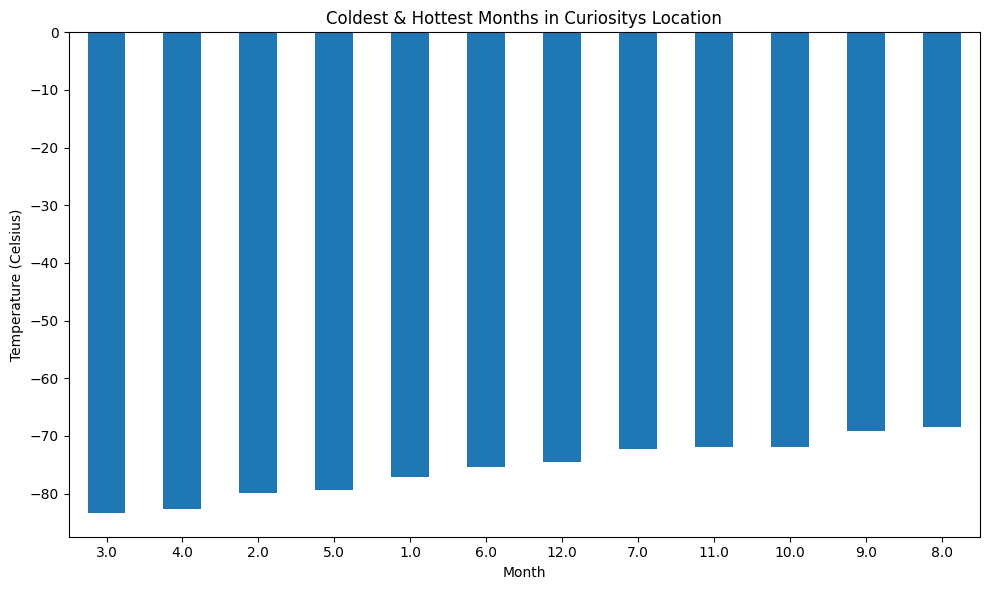

In [51]:
# Trie les données de température minimale moyenne par mois
sorted_weather_df = avg_low_temp.sort_values()

# Trace un graphique des mois les plus froids et les plus chauds à l'emplacement de Curiosity
plt.figure(figsize=(10, 6))
sorted_weather_df.plot(kind='bar',color='yellow')
plt.title('Mois les plus froids et les plus chauds à l\'emplacement de Curiosity')
plt.xlabel('Mois')
plt.ylabel('Température (Celsius)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [52]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


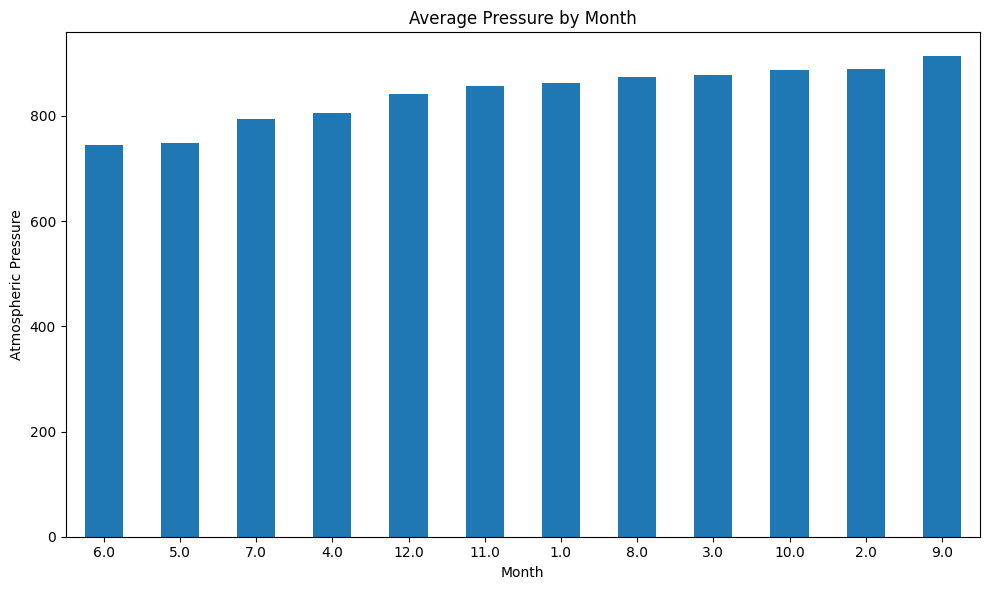

In [53]:
# Trie les données de pression atmosphérique moyenne par mois
sorted_average_pressure = avg_pressure_by_month.sort_values()

# Trace un graphique de la pression atmosphérique moyenne par mois
plt.figure(figsize=(10, 6))
sorted_average_pressure.plot(kind='bar')
plt.title('Pression atmosphérique moyenne par mois')
plt.xlabel('Mois')
plt.ylabel('Pression atmosphérique')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

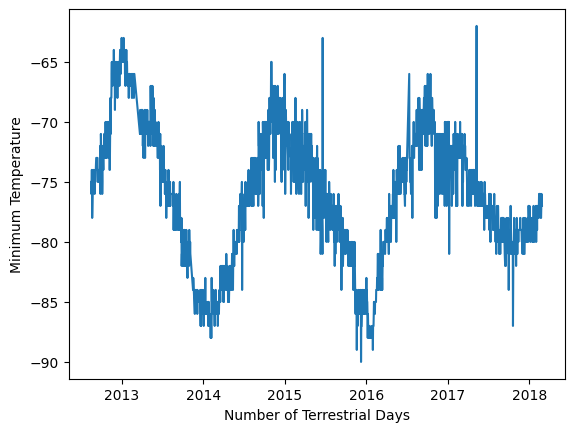

In [54]:
# 5. Combien de jours terrestres (terre) y a-t-il dans une année martienne ?

# Sélectionne les données de température minimale pour l'axe des y
y_axis = mars_weather_df["min_temp"]
plt.ylabel('Température minimale')

# Sélectionne les dates terrestres pour l'axe des x
x_axis = mars_weather_df["terrestrial_date"]
plt.xlabel('Nombre de jours terrestres')
plt.plot(x_axis, y_axis)
plt.show()

In [55]:
# Écriture des données dans un fichier CSV
mars_weather_df.to_csv("mars_weather_df.csv", index = False, header = True)